In [11]:
pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.3.4/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### 전처리

In [ ]:
# IQR 기반 이상치 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1분위수 (25%)
    Q3 = df[column].quantile(0.75)  # 3분위수 (75%)
    IQR = Q3 - Q1  # 사분위 범위

    lower_bound = Q1 - 1.5 * IQR  # 하한값
    upper_bound = Q3 + 1.5 * IQR  # 상한값

    # 이상치가 아닌 값만 필터링
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


# Z-score 기반 이상치 제거 함수
def remove_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()

    # 이상치 기준: Z-score가 ±3을 벗어나는 값 제거
    df_filtered = df[np.abs((df[column] - mean) / std) <= threshold]
    return df_filtered


# 백분위율 결정
def remove_outliers_percentile(
    df, column, lower_percentile=0.01, upper_percentile=0.99
):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
import numpy as np
import pandas as pd

file_path = "/Users/seojeonghun/Desktop/DBisFree/0226/모델링용_수정_회귀용.csv"
df = pd.read_csv(file_path)
df = df.dropna(
    subset=[
        "공시여부",
        "총액대비영업이익",
        "총자산변화율",
        "영업이익률표준편차",
        "이회",
        "사회",
        "부채비율",
        "PER",
        "공시여부",
    ]
)
df.info()

# 로그 변환
log_vars = ["총배당금액"]
for var in log_vars:
    df[f"log_{var}"] = np.log(df[var].replace(0, np.nan))  # 0을 NaN으로 변경

<class 'pandas.core.frame.DataFrame'>
Index: 7201 entries, 0 to 7822
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0     INDEX    7201 non-null   int64  
 1   corp_code  7201 non-null   int64  
 2   종목명        7201 non-null   object 
 3   시장구분       7201 non-null   object 
 4   year       7201 non-null   int64  
 5   배당성향       7201 non-null   float64
 6   린트너변수      7201 non-null   float64
 7   ln_시가총액    7201 non-null   float64
 8   총액대비영업이익   7201 non-null   float64
 9   세후영업이익     7201 non-null   float64
 10  총자산변화율     7201 non-null   float64
 11  총매출액       7201 non-null   float64
 12  영업이익률표준편차  7201 non-null   float64
 13  배당횟수       7201 non-null   int64  
 14  일회         7201 non-null   int64  
 15  이회         7201 non-null   int64  
 16  삼회         7201 non-null   int64  
 17  사회         7201 non-null   int64  
 18  Y2016      7201 non-null   int64  
 19  Y2017      7201 non-null   int64  
 20  Y2018      72

In [ ]:
from scipy.stats import zscore


# 백분위율 결정
def remove_outliers_percentile(
    df, column, lower_percentile=0.01, upper_percentile=0.99
):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# 린트너변수 이상치 제거 후 새로운 데이터프레임 생성
df = remove_outliers_percentile(
    df, "총자산변화율", lower_percentile=0.01, upper_percentile=0.99
)
df = remove_outliers_percentile(
    df, "부채비율", lower_percentile=0.01, upper_percentile=0.99
)

# 로그 변환
log_vars = ["총배당금액"]
for var in log_vars:
    df[f"log_{var}"] = np.log(df[var].replace(0, np.nan))  # 0을 NaN으로 변경


# z-score
df["부채비율"] = (df["부채비율"] - df["부채비율"].mean()) / df["부채비율"].std()

df_KOSPI = df[df["시장구분"] == "KOSPI"]
df_KOSDAQ = df[df["시장구분"] == "KOSDAQ"]

df_KOSPI.info()
df_KOSDAQ.info()

# CSV 파일로 저장
output_file = "/Users/seojeonghun/Desktop/DBisFree/0226/KOSDAQ.csv"

# 전체 데이터를 CSV 파일로 저장
df_KOSDAQ.to_csv(output_file, encoding="utf-8", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 3449 entries, 0 to 7798
Data columns (total 56 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0     INDEX    3449 non-null   int64  
 1   corp_code  3449 non-null   int64  
 2   종목명        3449 non-null   object 
 3   시장구분       3449 non-null   object 
 4   year       3449 non-null   int64  
 5   배당성향       3449 non-null   float64
 6   린트너변수      3449 non-null   float64
 7   ln_시가총액    3449 non-null   float64
 8   총액대비영업이익   3449 non-null   float64
 9   세후영업이익     3449 non-null   float64
 10  총자산변화율     3449 non-null   float64
 11  총매출액       3449 non-null   float64
 12  영업이익률표준편차  3449 non-null   float64
 13  배당횟수       3449 non-null   int64  
 14  일회         3449 non-null   int64  
 15  이회         3449 non-null   int64  
 16  삼회         3449 non-null   int64  
 17  사회         3449 non-null   int64  
 18  Y2016      3449 non-null   int64  
 19  Y2017      3449 non-null   int64  
 20  Y2018      34

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [ ]:
# 사용할 독립변수 리스트
variables = [
    "log_총배당금액",
    "ln_시가총액",
    "총액대비영업이익",
    "총자산변화율",
    "영업이익률표준편차",
    "이회",
    "사회",
    "부채비율",
    "공시여부",
]

# 기초통계량 출력
for i in variables:
    summary_stats = df[variables].describe()
    print(summary_stats)
    break

         log_총배당금액      ln_시가총액     총액대비영업이익       총자산변화율    영업이익률표준편차  \
count  6915.000000  6915.000000  6915.000000  6915.000000  6915.000000   
mean     21.941413    26.061393     0.156376     8.386205     3.085193   
std       1.532839     1.429194     0.366964    13.234554     3.464567   
min      17.473517    21.380993    -3.781648   -17.700000     0.010000   
25%      20.871092    25.097346     0.044880     0.550000     1.160000   
50%      21.734867    25.791365     0.093378     5.530000     2.230000   
75%      22.760530    26.714892     0.167964    12.785000     3.810000   
max      30.205487    33.812180    11.378181    89.350000    76.400000   

                이회           사회          부채비율         공시여부  
count  6915.000000  6915.000000  6.915000e+03  6915.000000  
mean      0.051338     0.005785 -4.110153e-17     0.061605  
std       0.220702     0.075841  1.000000e+00     0.240454  
min       0.000000     0.000000 -1.074748e+00     0.000000  
25%       0.000000     0.000

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

### 모델링    

In [ ]:
# 독립변수 및 종속변수 지정
y = df["log_총배당금액"]
X = df[
    [
        "ln_시가총액",
        "총액대비영업이익",
        "총자산변화율",
        "영업이익률표준편차",
        "이회",
        "사회",
        "부채비율",
        "PER",
        "공시여부",
        "Y2017",
        "Y2018",
        "Y2019",
        "Y2020",
        "Y2021",
        "Y2022",
        "Y2023",
        "b",
        "c",
        "d",
        "f",
        "g",
        "h",
        "i",
        "j",
        "k",
        "l",
        "r",
        "s",
    ]
]

# 종목코드를 원핫 인코딩하여 기업 더미 변수 생성
company_dummies = pd.get_dummies(df["corp_code"].astype(str), drop_first=True).astype(
    int
)

# 모든 독립변수 합치기
X = pd.concat([X, company_dummies], axis=1)
X = sm.add_constant(X)

# Statsmodels 회귀 모델 생성 (전체 데이터 사용)
X_sm = sm.add_constant(X)  # 상수항 추가
model_sm = sm.OLS(y, X_sm).fit()

# 조정된 결정계수 및 F-Score 출력
adjusted_r2 = model_sm.rsquared_adj  # 조정된 R²
f_stat = model_sm.fvalue  # F-Score
f_p_value = model_sm.f_pvalue  # F-test의 p-value

print(f"Adjusted R²: {adjusted_r2:.4f}")
print(f"F-Statistic: {f_stat:.4f}")
print(f"F-test P-value: {f_p_value:.4f}")
print(summary.as_text())

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 설정 (Windows & Mac)
plt.rc("font", family="AppleGothic")  # Mac

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 사용할 변수 리스트
variables = [
    "log_시가총액1",
    "영업이익률",
    "총자산변화율",
    "영업이익률표준편차",
    "부채비율",
    "PER",
    "사회",
    "이회",
    "공시여부",
]
dependent_var = "log_총배당금액"  # 종속변수

# 변수별 분포 시각화 (박스플롯 & 산점도)
plt.figure(figsize=(12, len(variables) * 4))

for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 2, 2 * i - 1)
    sns.boxplot(x=var, y=dependent_var, data=df)
    plt.title(f"{var} vs {dependent_var} (박스플롯)")

    plt.subplot(len(variables), 2, 2 * i)
    sns.scatterplot(x=df[var], y=df[dependent_var])
    plt.title(f"{var} vs {dependent_var} (산점도)")

plt.tight_layout()
plt.show()

In [ ]:
# 회귀 결과 추출
summary_df = pd.DataFrame(
    model_sm.summary2().tables[1]
)  # summary2() 사용하여 테이블 데이터 추출
summary_df = summary_df.round(6)  # 소수점 6자리까지 표시


# 결과 출력
print(summary_df)

# CSV 파일로 저장
output_file = "/Users/seojeonghun/Desktop/DBisFree/0226/회귀_요약.csv"

# 전체 데이터를 CSV 파일로 저장
summary_df.to_csv(output_file, encoding="utf-8", index=False)

               Coef.  Std.Err.          t     P>|t|     [0.025     0.975]
const      14.000071  0.324349  43.163645  0.000000  13.364222  14.635921
ln_시가총액     0.297291  0.012079  24.612867  0.000000   0.273612   0.320969
총액대비영업이익    0.257253  0.017696  14.537306  0.000000   0.222562   0.291945
총자산변화율      0.003840  0.000424   9.065586  0.000000   0.003010   0.004670
영업이익률표준편차  -0.008389  0.002139  -3.921603  0.000089  -0.012582  -0.004195
...              ...       ...        ...       ...        ...        ...
99390      -3.106023  0.326832  -9.503425  0.000000  -3.746741  -2.465305
99430      -1.645437  0.387162  -4.250000  0.000022  -2.404425  -0.886450
99440      -1.927684  0.248477  -7.758009  0.000000  -2.414795  -1.440573
9970       -0.371953  0.188644  -1.971721  0.048691  -0.741767  -0.002138
99750      -3.007620  0.325698  -9.234372  0.000000  -3.646115  -2.369125

[1330 rows x 6 columns]


<class 'pandas.core.frame.DataFrame'>
Index: 5333 entries, 0 to 7800
Columns: 122 entries,   INDEX to log_총자산대비시가총액
dtypes: float64(83), int64(29), object(10)
memory usage: 5.1+ MB
None

📌 다중공선성(VIF) 확인 (기업 더미 변수 제외)
         Feature       VIF
0      log_총배당금액  5.605097
2          영업이익률  2.932703
1  log_총자산대비시가총액  2.208029
4      영업이익률표준편차  1.972815
3         총자산변화율  1.614679
5           부채비율  1.244881
8           공시여부  1.080483
7             이회  1.061225
6             사회  1.015891
🚀 제거된 변수: []

📌 상관관계 높은 변수들 (상위 10개)

log_총자산대비시가총액  영업이익률            0.374632
영업이익률          log_총자산대비시가총액    0.374632
               총자산변화율           0.313311
총자산변화율         영업이익률            0.313311
log_총배당금액      영업이익률            0.278252
영업이익률          log_총배당금액        0.278252
사회             log_총배당금액        0.229455
log_총배당금액      사회               0.229455
log_총자산대비시가총액  영업이익률표준편차        0.178012
영업이익률표준편차      log_총자산대비시가총액    0.178012
dtype: float64


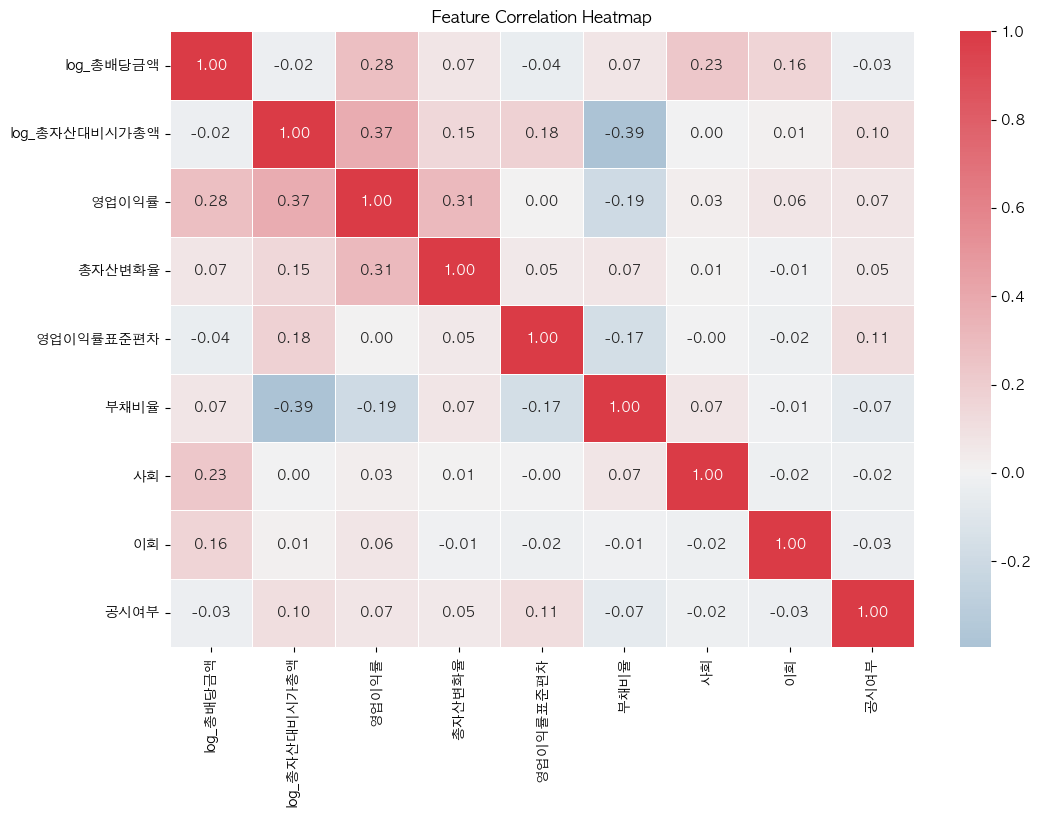

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[
    [
        "log_시가총액1",
        "총액대비영업이익",
        "총자산변화율",
        "영업이익률표준편차",
        "PER",
        "부채비율",
        "일회",
        "이회",
        "사회",
        "공시여부",
    ]
]

# 기업 더미 변수를 제외한 다중공선성(VIF) 확인
X_vif = X.drop(columns=company_dummies.columns, errors="ignore")
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])
]

# 변수 간 상관관계 확인
correlation_matrix = X_vif.corr()

print("\n📌 다중공선성(VIF) 확인 (기업 더미 변수 제외)")
print(vif_data.sort_values(by="VIF", ascending=False))

# 높은 공선성을 가지는 변수들 출력
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
print(f"🚀 제거된 변수: {high_vif_features}")

print("\n📌 상관관계 높은 변수들 (상위 10개)\n")
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # 자기 자신과의 상관관계 제외
print(high_corr_pairs.head(10))

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, center=0
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/seojeonghun/Desktop/구조방정식_최종_데이터셋.xlsx"
df = pd.read_excel(file_path)


# 로그 변환
log_vars = ["market_evaluation"]
for var in log_vars:
    df[f"log_{var}"] = np.log(df[var].replace(0, np.nan))  # 0을 NaN으로 변경
df.info()

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[["total_asset_rate", "total_equity_rate", "total_revenue_rate"]]

# 기업 더미 변수를 제외한 다중공선성(VIF) 확인
X_vif = X
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])
]

# 변수 간 상관관계 확인
correlation_matrix = X_vif.corr()
print(df.info())
print("\n📌 다중공선성(VIF) 확인 (기업 더미 변수 제외)")
print(vif_data.sort_values(by="VIF", ascending=False))

# 높은 공선성을 가지는 변수들 출력
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
print(f"🚀 제거된 변수: {high_vif_features}")

print("\n📌 상관관계 높은 변수들 (상위 10개)\n")
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # 자기 자신과의 상관관계 제외
print(high_corr_pairs.head(10))

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, center=0
)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

# 한글 폰트 설정 (Windows & Mac)
plt.rc("font", family="AppleGothic")  # Mac 사용 시

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 사용할 변수 리스트
variable = ["min_max_market_evaluation"]
dependent_var = "ln_total_dividend"  # 종속변수

# 변수별 분포 시각화 (박스플롯 & 산점도)
plt.figure(figsize=(12, 4))  # 변수가 1개이므로 크기를 조정

var = variable[0]  # 변수 리스트에서 값 가져오기

# (1) 히스토그램 & KDE 그래프
plt.subplot(1, 3, 1)
sns.histplot(df[var], bins=30, kde=True)
plt.title(f"{var} 분포 (히스토그램 & KDE)")

# (2) Q-Q Plot (정규성 확인)
plt.subplot(1, 3, 2)
stats.probplot(df[var], dist="norm", plot=plt)
plt.title(f"{var} Q-Q Plot")

# 종속변수와의 관계확인
plt.subplot(1, 3, 3)
sns.scatterplot(x=df[var], y=df[dependent_var])
plt.title(f"{var} vs {dependent_var} (산점도)")

plt.tight_layout()
plt.show()

### 세그먼트 분석

In [ ]:
# 세그먼트

file_path = "/Users/seojeonghun/Desktop/DBisFree/0226/KOSPI.csv"
df = pd.read_csv(file_path)
df = df.dropna(
    subset=[
        "공시여부",
        "총액대비영업이익",
        "총자산변화율",
        "영업이익률표준편차",
        "이회",
        "사회",
        "부채비율",
        "PER",
        "공시여부",
    ]
)

# 린트너변수 이상치 제거 후 새로운 데이터프레임 생성
df = remove_outliers_percentile(
    df, "총자산변화율", lower_percentile=0.01, upper_percentile=0.99
)
df = remove_outliers_percentile(
    df, "부채비율", lower_percentile=0.01, upper_percentile=0.99
)

# 로그 변환
log_vars = ["총배당금액"]
for var in log_vars:
    df[f"log_{var}"] = np.log(df[var].replace(0, np.nan))  # 0을 NaN으로 변경

# z-score
df["부채비율"] = (df["부채비율"] - df["부채비율"].mean()) / df["부채비율"].std()

# 사용할 독립변수 리스트
variables = [
    "log_총배당금액",
    "ln_시가총액",
    "총액대비영업이익",
    "총자산변화율",
    "영업이익률표준편차",
    "이회",
    "사회",
    "부채비율",
    "공시여부",
]

# 기초통계량 출력
for i in variables:
    summary_stats = df[variables].describe()
    print(summary_stats)
    break

         log_총배당금액      ln_시가총액     총액대비영업이익       총자산변화율    영업이익률표준편차  \
count  3427.000000  3427.000000  3427.000000  3427.000000  3427.000000   
mean     22.626930    26.594427     0.200177     6.986242     2.544155   
std       1.656477     1.615293     0.457127    11.351246     3.385229   
min      18.308017    21.909289    -3.781648   -16.860000     0.010000   
25%      21.498329    25.478285     0.057422     0.315000     0.980000   
50%      22.484748    26.309941     0.109217     4.660000     1.810000   
75%      23.493228    27.518366     0.203670    10.625000     3.060000   
max      30.205487    33.812180     8.792543    76.480000    76.400000   

                이회           사회          부채비율         공시여부  
count  3427.000000  3427.000000  3.427000e+03  3427.000000  
mean      0.069740     0.011088 -1.212919e-16     0.025095  
std       0.254746     0.104731  1.000000e+00     0.156436  
min       0.000000     0.000000 -1.168577e+00     0.000000  
25%       0.000000     0.000

In [ ]:
# 독립변수 및 종속변수 지정(KOSPI)
y = df["log_총배당금액"]
X = df[
    [
        "ln_시가총액",
        "총액대비영업이익",
        "총자산변화율",
        "영업이익률표준편차",
        "이회",
        "사회",
        "부채비율",
        "PER",
        "공시여부",
        "Y2017",
        "Y2018",
        "Y2019",
        "Y2020",
        "Y2021",
        "Y2022",
        "Y2023",
        "b",
        "c",
        "d",
        "f",
        "g",
        "h",
        "i",
        "j",
        "k",
        "l",
        "r",
        "s",
    ]
]

# 종목코드를 원핫 인코딩하여 기업 더미 변수 생성
company_dummies = pd.get_dummies(df["corp_code"].astype(str), drop_first=True).astype(
    int
)

# 모든 독립변수 합치기
X = pd.concat([X, company_dummies], axis=1)
X = sm.add_constant(X)

# Statsmodels 회귀 모델 생성 (전체 데이터 사용)
model_sm = sm.OLS(y, X_sm).fit()

# 조정된 결정계수 및 F-Score 출력
adjusted_r2 = model_sm.rsquared_adj  # 조정된 R²
f_stat = model_sm.fvalue  # F-Score
f_p_value = model_sm.f_pvalue  # F-test의 p-value

print(f"Adjusted R²: {adjusted_r2:.4f}")
print(f"F-Statistic: {f_stat:.4f}")
print(f"F-test P-value: {f_p_value:.4f}")
print(summary.as_text())

In [ ]:
# 세그먼트 분석(KOSPI)
df_KOSDAQ = df[df["시장구분"] == "KOSDAQ"]
print(df_KOSDAQ.info())

# 독립변수 및 종속변수 지정(KOSPI)
y = df_KOSDAQ["log_총배당금액"]
X = df_KOSDAQ[
    [
        "ln_시가총액",
        "총액대비영업이익",
        "총자산변화율",
        "영업이익률표준편차",
        "이회",
        "사회",
        "부채비율",
        "PER",
        "공시여부",
        "Y2017",
        "Y2018",
        "Y2019",
        "Y2020",
        "Y2021",
        "Y2022",
        "Y2023",
        "b",
        "c",
        "d",
        "f",
        "g",
        "h",
        "i",
        "j",
        "k",
        "l",
        "r",
        "s",
    ]
]

# 종목코드를 원핫 인코딩하여 기업 더미 변수 생성
company_dummies = pd.get_dummies(
    df_KOSPI["corp_code"].astype(str), drop_first=True
).astype(int)

# 모든 독립변수 합치기
X = pd.concat([X, company_dummies], axis=1)
X = sm.add_constant(X)

# Statsmodels 회귀 모델 생성 (전체 데이터 사용)
X_sm = sm.add_constant(X)  # 상수항 추가
model_sm = sm.OLS(y, X_sm).fit()

# 조정된 결정계수 및 F-Score 출력
adjusted_r2 = model_sm.rsquared_adj  # 조정된 R²
f_stat = model_sm.fvalue  # F-Score
f_p_value = model_sm.f_pvalue  # F-test의 p-value

print(f"Adjusted R²: {adjusted_r2:.4f}")
print(f"F-Statistic: {f_stat:.4f}")
print(f"F-test P-value: {f_p_value:.4f}")
print(summary.as_text())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 56 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0     INDEX    0 non-null      int64  
 1   corp_code  0 non-null      int64  
 2   종목명        0 non-null      object 
 3   시장구분       0 non-null      object 
 4   year       0 non-null      int64  
 5   배당성향       0 non-null      float64
 6   린트너변수      0 non-null      float64
 7   ln_시가총액    0 non-null      float64
 8   총액대비영업이익   0 non-null      float64
 9   세후영업이익     0 non-null      float64
 10  총자산변화율     0 non-null      float64
 11  총매출액       0 non-null      float64
 12  영업이익률표준편차  0 non-null      float64
 13  배당횟수       0 non-null      int64  
 14  일회         0 non-null      int64  
 15  이회         0 non-null      int64  
 16  삼회         0 non-null      int64  
 17  사회         0 non-null      int64  
 18  Y2016      0 non-null      int64  
 19  Y2017      0 non-null      int64  
 20  Y2018      0 non-null      

MissingDataError: exog contains inf or nans